In [7]:
import numpy as np
import matplotlib.pyplot as plt


Parameters

In [8]:
T = 1
x0 = 0.1
kappa = 0.5
theta = 0.1
sigma = 0.8
N = 10000
dt = 0.001


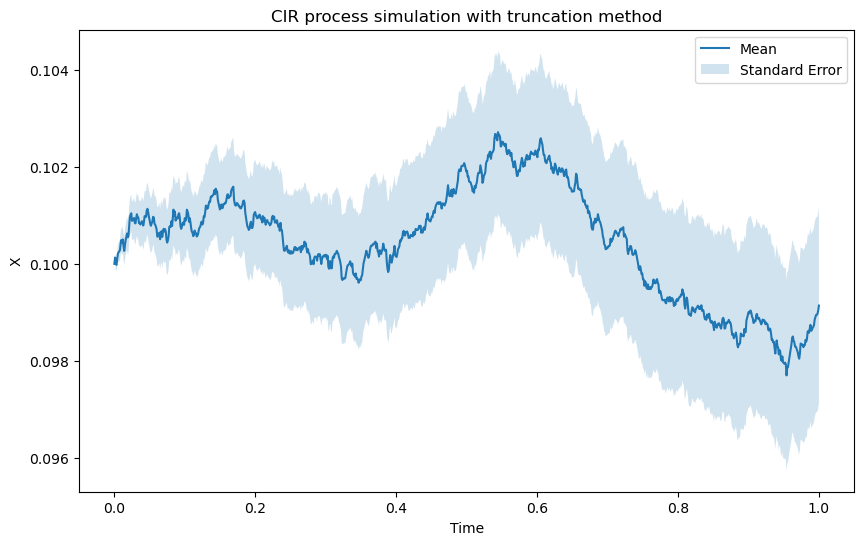

In [20]:
np.random.seed(20)

def path_sim(X0=x0, n=N, dt=dt, T=T):

    nT = T / dt  #  "number" of time steps, but may not be an integer
    nT = int(nT + 1)  #  round up to the nearest integer, the number of time steps
    dt = T / nT  #  adjust the time step down accordingly

    T = np.linspace(0.0, T, nT + 1)  # steps of size dt between 0 and T,
    # including 0 and T
    X = np.zeros((n, (nT + 1)), np.float64)  #  allocate path array
    for i in range(n):
        X[i, 0] = X0
    for k in range(nT):  # take a time step for all n paths at once

        X[:, k + 1] = (
            X[:, k]
            + kappa * (theta - np.maximum(0, X[:, k])) * dt
            + np.random.normal(size=n) * sigma * np.sqrt(dt * np.maximum(0, X[:, k]))
        )

    return (X, T)


X, Time = path_sim()
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0) / np.sqrt(N)

plt.figure(figsize=(10, 6))
plt.plot(Time, mean_X, label="Mean")
plt.fill_between(
    Time, mean_X - std_X, mean_X + std_X, alpha=0.2, label="Standard Error"
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("X")
plt.title("CIR process simulation with truncation method")
plt.show()


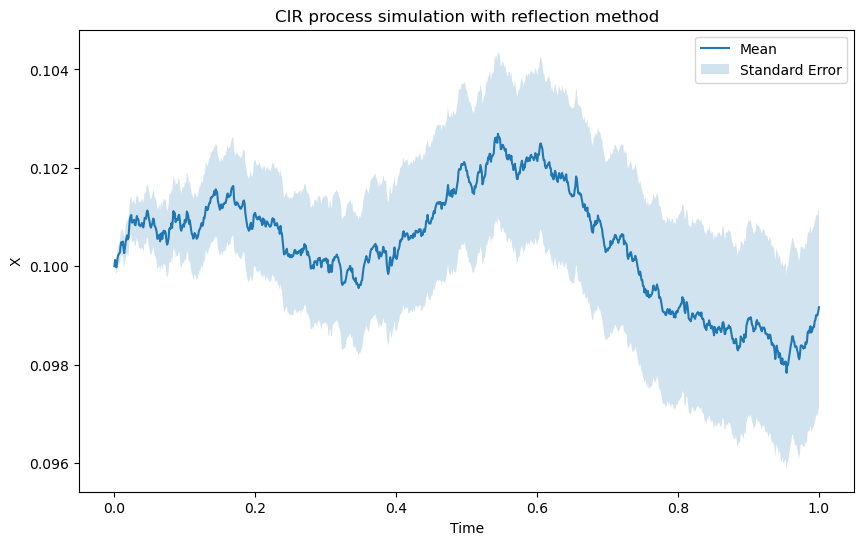

In [21]:
np.random.seed(20)

def path_sim2(X0=x0, n=N, dt=dt, T=T):

    nT = T / dt  #  "number" of time steps, but may not be an integer
    nT = int(nT + 1)  #  round up to the nearest integer, the number of time steps
    dt = T / nT  #  adjust the time step down accordingly

    T = np.linspace(0.0, T, nT + 1)  # steps of size dt between 0 and T,
    # including 0 and T
    X = np.zeros((n, (nT + 1)), np.float64)  #  allocate path array
    for i in range(n):
        X[i, 0] = X0
    for k in range(nT):  # take a time step for all n paths at once

        X[:, k + 1] = (
            X[:, k]
            + kappa * (theta - X[:, k]) * dt
            + np.random.normal(size=n) * sigma * np.sqrt(dt * np.abs(X[:, k]))
        )

    return (X, T)


X2, Time2 = path_sim2()
mean_X2 = np.mean(X2, axis=0)
std_X2 = np.std(X2, axis=0) / np.sqrt(N)

plt.figure(figsize=(10, 6))
plt.plot(Time2, mean_X2, label="Mean")
plt.fill_between(
    Time2, mean_X2 - std_X2, mean_X2 + std_X2, alpha=0.2, label="Standard Error"
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("X")
plt.title("CIR process simulation with reflection method")
plt.show()


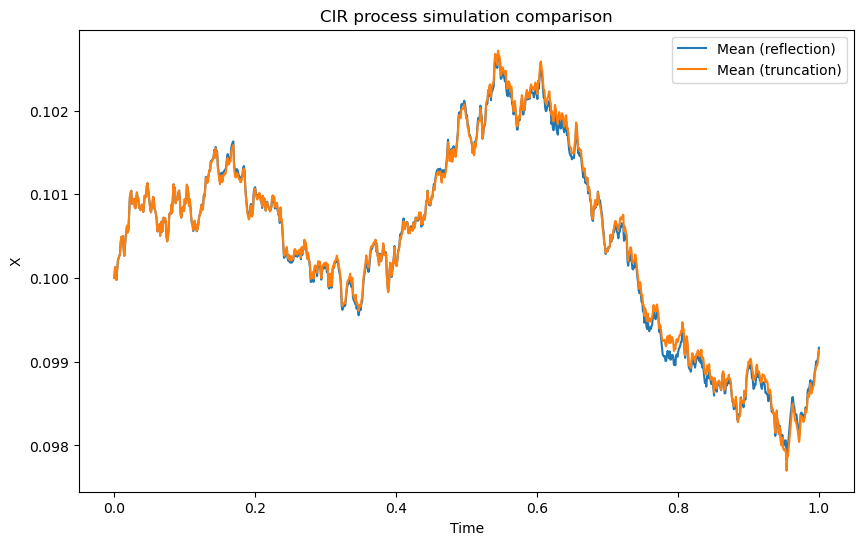

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(Time2, mean_X2, label="Mean (reflection)")
plt.plot(Time, mean_X, label="Mean (truncation)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("X")
plt.title("CIR process simulation comparison")
plt.show()


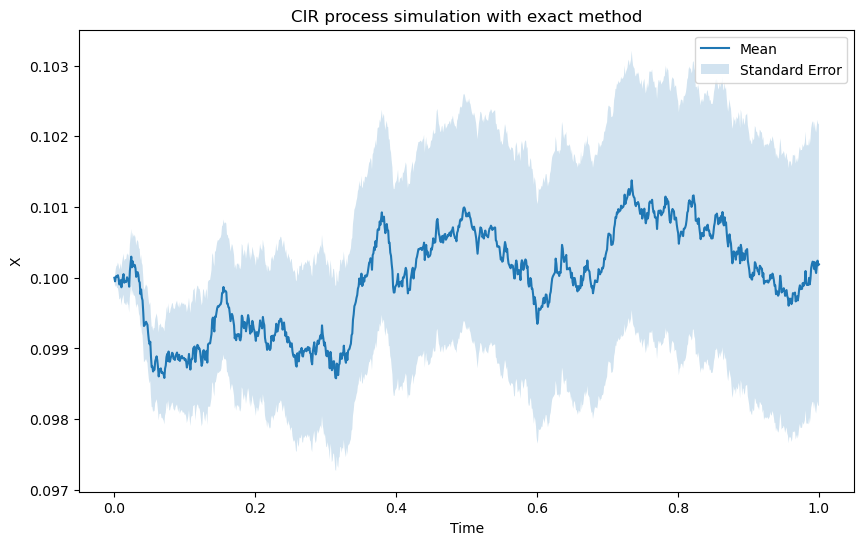

In [23]:
np.random.seed(20)

def path_sim3(X0=x0, n=N, dt=dt, T=T):

    nT = T / dt  #  "number" of time steps, but may not be an integer
    nT = int(nT + 1)  #  round up to the nearest integer, the number of time steps
    dt = T / nT  #  adjust the time step down accordingly

    T = np.linspace(0.0, T, nT + 1)  # steps of size dt between 0 and T,
    # including 0 and T
    X = np.zeros((n, (nT + 1)), np.float64)  #  allocate path array
    for i in range(n):
        X[i, 0] = X0
    for k in range(nT):  # take a time step for all n paths at once

        d = (4 * theta * kappa) / (sigma**2)
        nonc = (
            (4 * kappa * np.exp(-kappa * dt))
            / (sigma**2 * (1 - np.exp(-kappa * dt)))
            * X[:, k]
        )
        X[:, k + 1] = (
            sigma**2 * (1 - np.exp(-kappa * dt)) / (4 * kappa)
        ) * np.random.noncentral_chisquare(d, nonc, size=n)

    return (X, T)


X3, Time3 = path_sim3()
mean_X3 = np.mean(X3, axis=0)
std_X3 = np.std(X3, axis=0) / np.sqrt(N)

plt.figure(figsize=(10, 6))
plt.plot(Time3, mean_X3, label="Mean")
plt.fill_between(
    Time3, mean_X3 - std_X3, mean_X3 + std_X3, alpha=0.2, label="Standard Error"
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("X")
plt.title("CIR process simulation with exact method")
plt.show()


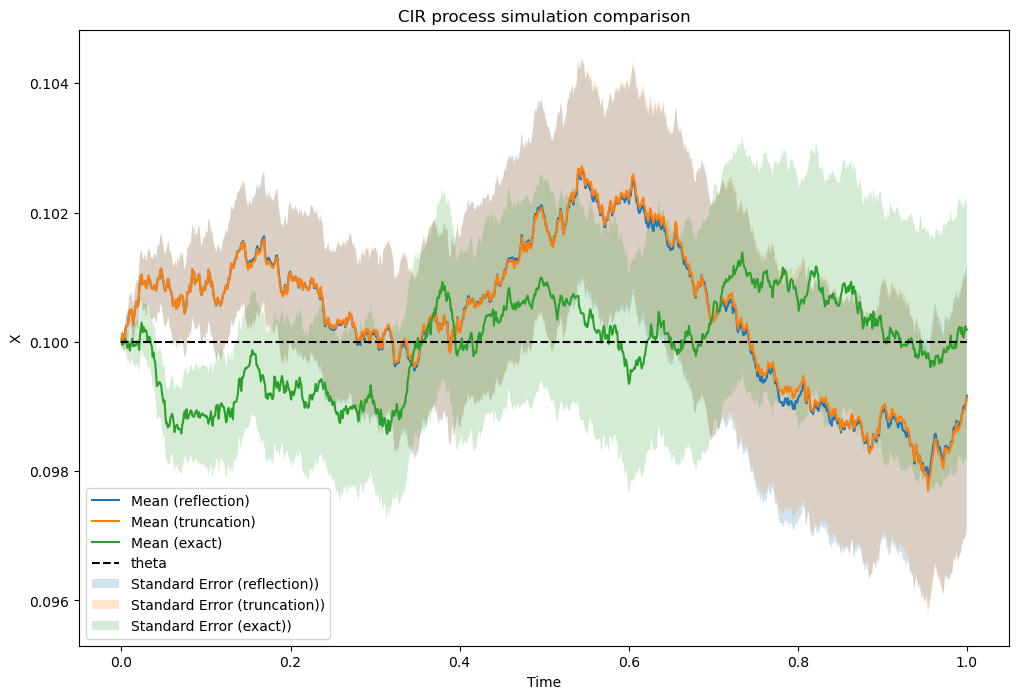

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(Time2, mean_X2, label="Mean (reflection)")
plt.plot(Time, mean_X, label="Mean (truncation)")
plt.plot(Time3, mean_X3, label="Mean (exact)")
# add dotted line at theta
plt.plot(Time, theta * np.ones(len(Time)), "k--", label="theta")

plt.fill_between(
    Time2, mean_X2 - std_X2, mean_X2 + std_X2, alpha=0.2, label="Standard Error (reflection))"
)
plt.fill_between(
    Time, mean_X - std_X, mean_X + std_X, alpha=0.2, label="Standard Error (truncation))"
)

plt.fill_between(
    Time3, mean_X3 - std_X3, mean_X3 + std_X3, alpha=0.2, label="Standard Error (exact))"
)

plt.legend(loc="lower left")
plt.xlabel("Time")
plt.ylabel("X")
plt.title("CIR process simulation comparison")
plt.show()


Both approximations give similar but not identical results to the exact solution

In [18]:
%timeit _,_ = path_sim()
%timeit _,_ = path_sim2()
%timeit _,_ = path_sim3()


264 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
260 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
794 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The truncation and reflection method have more or less the same speed whil the exact method is much slower (2-3x)